# Figure 4

All plots in the manuscript are done with DPI = 600. In the jupyter notebook I changed it to *200*


# Packages required

Run it all at the same time to get the plots # Packages

In [16]:
 
from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error
import numdifftools
from PIL import Image
from sklearn.metrics import r2_score
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile



import glob


# Asthetics

In [17]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713", "#6A6969"]
palette = sns.color_palette(colors)
n = 1

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": n, 'axes.linewidth':n, 
                                  "xtick.major.width":n,"ytick.major.width":n}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863),
 (0.41568627450980394, 0.4117647058823529, 0.4117647058823529)]

# Figure 4B

In [18]:
b = pd.read_csv("Figure4B_no_dissolved.csv")
b

,Time,entry,Refuel_time,EDC,Cycle,variable,value
0,0.000000,0,8min,50mM,0,C3,1.4411
1,0.150000,0,8min,50mM,0,C3,1.7995
2,0.316667,0,8min,50mM,0,C3,1.8369
3,0.483333,0,8min,50mM,0,C3,1.8456
4,0.650000,0,8min,50mM,0,C3,1.8406
...,...,...,...,...,...,...,...
577,47.050000,0,8min,50mM,2,C4,0.0162
578,47.216667,0,8min,50mM,2,C4,0.0163
579,47.383333,0,8min,50mM,2,C4,0.0161
580,47.550000,0,8min,50mM,2,C4,0.0168


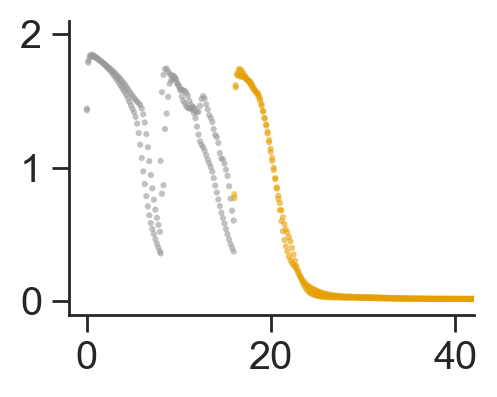

In [19]:
fig, ax = plt.subplots(figsize = (2.75,2.25), dpi = 200)

sns.scatterplot(data = b.query("Cycle == 0 ")
                , x = "Time", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 5, alpha = .6)
sns.scatterplot(data = b.query("Cycle == 1")
                , x = "Time", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 5, alpha = .6)
sns.scatterplot(data = b.query("Cycle == 2")
                , x = "Time", y = "value", ax = ax, 
                color = "C4", edgecolor = "none", s = 5, alpha = .6)


sns.despine(fig, left=False, bottom=False)
ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 60, 4), yticks = np.linspace(0, 2, 3), ylim = (-0.1, 2.1),xlim =  (-2, 42))
#ax.axvline(x = 8, ls = "--", lw = .3, c = "black")
#ax.axvline(x = 16, ls = "--", lw = .3, c = "black")

plt.tight_layout()

# Figure 4C

In [20]:
c = pd.read_csv("Figure4C_dissolved.csv")

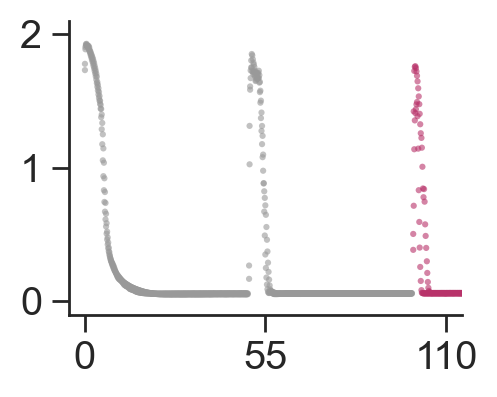

In [21]:
fig, ax = plt.subplots(figsize = (2.75,2.25), dpi = 200)

sns.scatterplot(data = c.query("Cycle == 0")
                , x = "Time", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 5, alpha = .6)
sns.scatterplot(data = c.query("Cycle == 1 ")
                , x = "Time", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 5, alpha = .6)
sns.scatterplot(data = c.query("Cycle == 2 ")
                , x = "Time", y = "value", ax = ax, 
                color = "#B8336A", edgecolor = "none", s = 5, alpha = .6)


sns.despine(fig, left=False, bottom=False)
ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 110, 3), yticks = np.linspace(0, 2, 3), ylim = (-0.1, 2.1),xlim =  (-5, 115))


plt.tight_layout()

## I break axis for readability

In [22]:
g = c.query("Cycle == 1")
g["Time_2"] = g["Time"] -20


/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_3730/4223423961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g["Time_2"] = g["Time"] -20


In [23]:
h = c.query("Cycle == 2")
h["Time_2"] = h["Time"] - 40


/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_3730/1969542023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h["Time_2"] = h["Time"] - 40


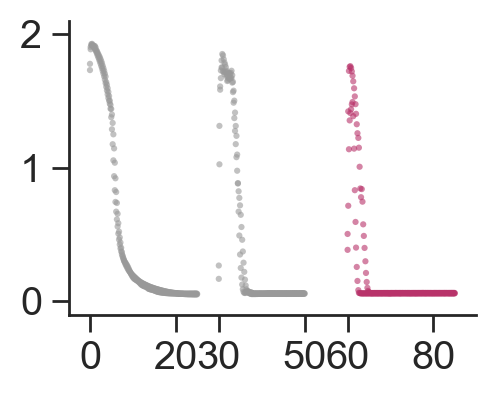

In [24]:
fig, ax = plt.subplots(figsize = (2.75,2.25), dpi = 200)

sns.scatterplot(data = c.query("Cycle == 0 & Time <25")
                , x = "Time", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 5, alpha = .6)
sns.scatterplot(data = g.query("Time_2 < 50")
                , x = "Time_2", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 5, alpha = .6)
sns.scatterplot(data = h.query("Time_2 < 85")
                , x = "Time_2", y = "value", ax = ax, 
                color = "#B8336A", edgecolor = "none", s = 5, alpha = .6)


sns.despine(fig, left=False, bottom=False)
ax.set(xlabel = "", ylabel = "", xticks =(0, 20, 30, 50, 60, 80), yticks = np.linspace(0, 2, 3), ylim = (-0.1, 2.1),xlim =  (-5, 90))


plt.tight_layout()

# Figure 4D

In [25]:
d = pd.read_csv("Figure4D_Lifetimes.csv")


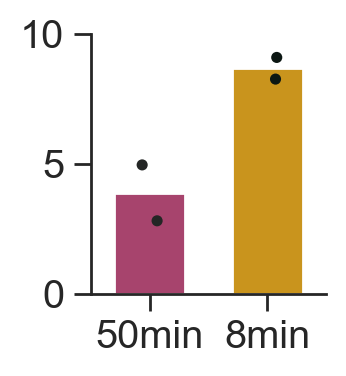

In [26]:
fig, ax = plt.subplots(figsize = (2.,2.15), dpi = 200)

o = [0, 1, 2, 3]



sns.stripplot(data = d, x = "Refuel_time", y = "Lt", 
              palette='dark:#0C1713', legend=False, ax = ax, hue = "Refuel_time", s = 4,
              dodge=False)

 
sns.barplot(data = d, x = "Refuel_time", y = "Lt",
             hue = "Refuel_time", 
             legend=False, 
             ax = ax, 
             dodge=False, 
             errorbar=None,  width=.6, palette= ["#B8336A", "C4"]) 
ax.set(yticks = np.linspace(0, 10, 3), xlabel = "", ylabel = "")

sns.despine()
plt.tight_layout()